<a href="https://colab.research.google.com/github/Imshyeon/2023_AI_BACKEND_AI/blob/master/Deep%20Learning/Generative%20Adversarial%20Network/Vanilla_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, LeakyReLU

# Load MNIST Dataset

In [6]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalization : -1 ~ 1 Range
X_train = (X_train.astype(float) - 127.5) / 127.5

# Reshape
X_train = X_train.reshape(60000, 28 * 28)

11490434/11490434 [==============================] - 0s 0us/step


# 'generator' Model

In [7]:
NOISE_DIM = 10

generator = Sequential(name = 'generator')

generator.add(Dense(256, input_shape = (NOISE_DIM,)))
generator.add(LeakyReLU())
generator.add(Dense(512))
generator.add(LeakyReLU())
generator.add(Dense(1024))
generator.add(LeakyReLU())
generator.add(Dense(784, activation = 'tanh'))

In [8]:
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2816      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 784)               80

# 'discriminator' Model

In [9]:
from tensorflow.keras.initializers import RandomNormal

discriminator = Sequential(name = 'discriminator')

discriminator.add(Dense(1024,
                        input_shape = (784,),
                        kernel_initializer = RandomNormal(stddev = 0.02)))

discriminator.add(LeakyReLU())
discriminator.add(Dropout(0.5))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU())
discriminator.add(Dropout(0.5))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU())
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1, activation = 'sigmoid'))

In [10]:
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)             

In [11]:
from tensorflow.keras.optimizers import Adam

discriminator.compile(loss='binary_crossentropy',
                      optimizer = Adam(learning_rate = 0.0002,
                                       beta_1 = 0.5))

# 'gan' Model

In [13]:
discriminator.trainable = False

gan_input = Input(shape = (NOISE_DIM,))
x = generator(gan_input)
output = discriminator(x)

In [14]:
gan = Model(gan_input, output, name = 'gan')

In [15]:
gan.summary()

Model: "gan"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 10)]              0         
                                                                 
 generator (Sequential)      (None, 784)               1463312   
                                                                 
 discriminator (Sequential)  (None, 1)                 1460225   
                                                                 
Total params: 2923537 (11.15 MB)
Trainable params: 1463312 (5.58 MB)
Non-trainable params: 1460225 (5.57 MB)
_________________________________________________________________


In [16]:
gan.compile(loss = 'binary_crossentropy',
            optimizer = Adam(learning_rate = 0.0002,
                             beta_1 = 0.5))

# Define 'get_batches()' Function

In [17]:
def get_batches(data, batch_size):
  batches = []

  for i in range(data.shape[0] // batch_size):
    batch = data[i * batch_size : (i + 1) * batch_size]
    batches.append(batch)
  return np.asarray(batches)

# 'visualize_training()' Function

In [18]:
def visualize_training(epoch, d_losses, g_losses):

  # 오차 시각화
  plt.figure(figsize = (8,4))
  plt.plot(d_losses, label = 'Discriminator Loss')
  plt.plot(g_losses, label = 'Generator Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  print('epoch: {}, Discriminator Loss : {}, Generator Loss : {}'.format(epoch, np.asarray(d_losses).mean(), np.asarray(g_losses).mean()))


  # 이미지 생성 결과 시각화
  print('epoch : ',epoch)
  noise = np.random.normal(0, 1, size = (24, NOISE_DIM))
  generated_images = generator.predict(noise, verbose = 0)
  generated_images = generated_images.reshape(-1, 28, 28)

  plt.figure(figsize = (8,4))
  for i in range(generated_images.shape[0]):
    plt.subplot(4, 6, i+1)
    plt.imshow(generated_images[i], interpolation='nearest', cmap = 'Greys_r')
    plt.axis('off')
  plt.tight_layout()
  plt.show()

# Model Training

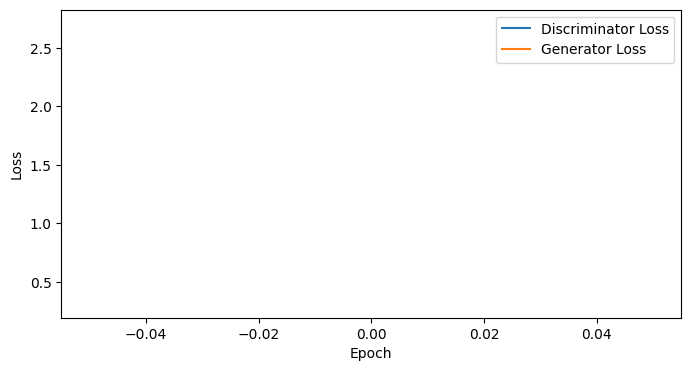

epoch: 1, Discriminator Loss : 0.31195205450057983, Generator Loss : 2.7083137035369873
epoch :  1


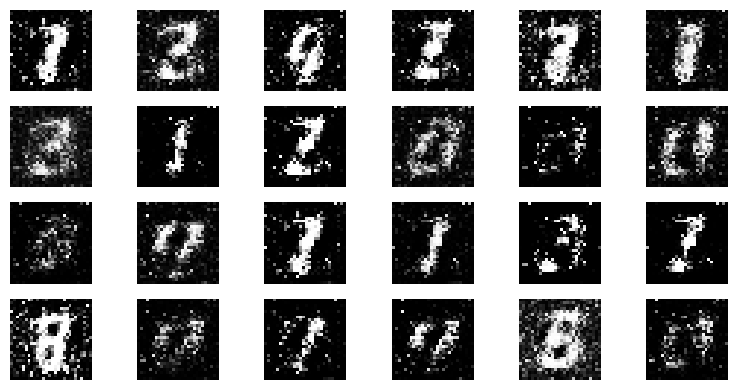

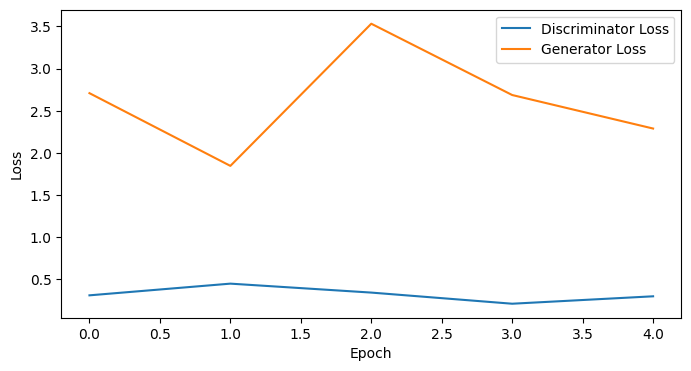

epoch: 5, Discriminator Loss : 0.3240158975124359, Generator Loss : 2.6122971534729005
epoch :  5


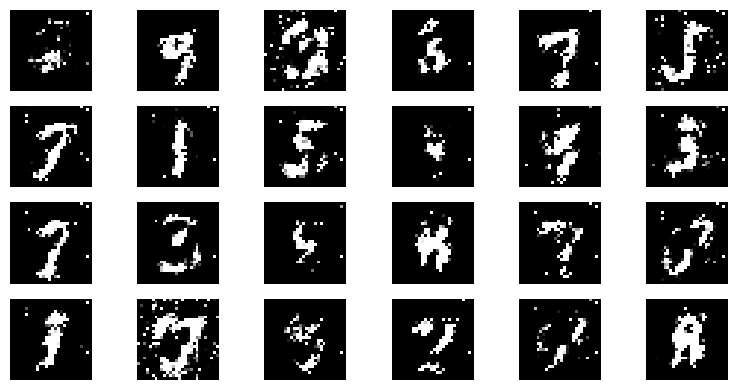

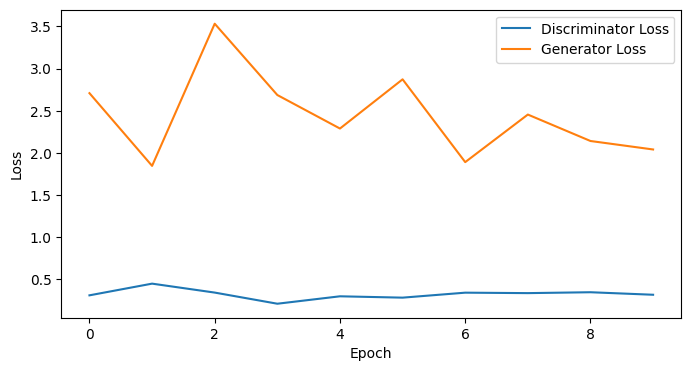

epoch: 10, Discriminator Loss : 0.32537855207920074, Generator Loss : 2.44616219997406
epoch :  10


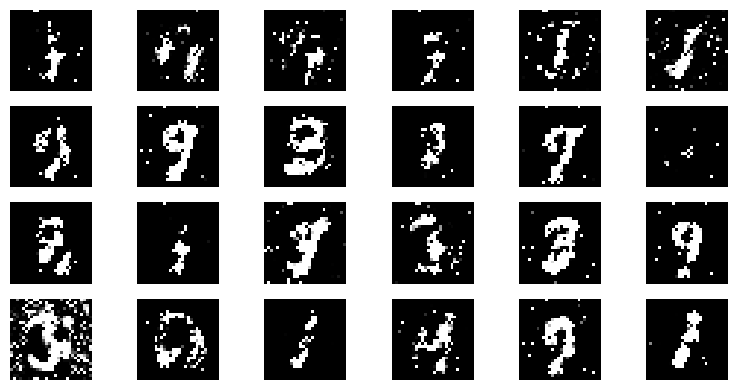

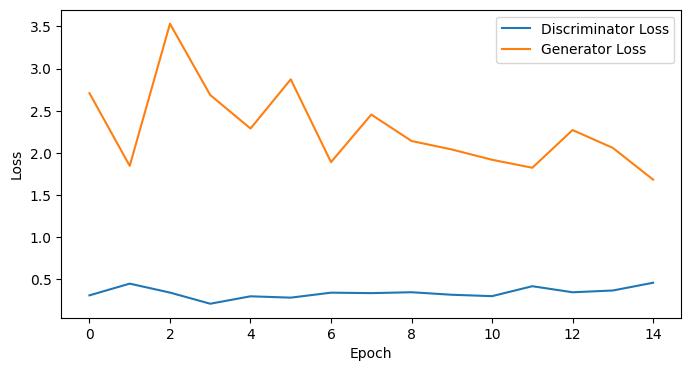

epoch: 15, Discriminator Loss : 0.3436594525973002, Generator Loss : 2.2812404235204062
epoch :  15


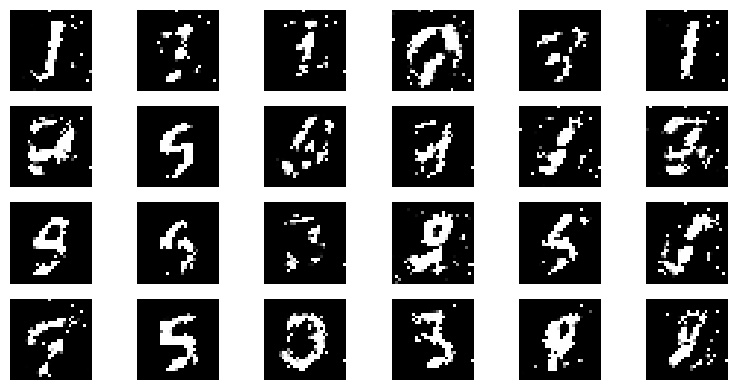

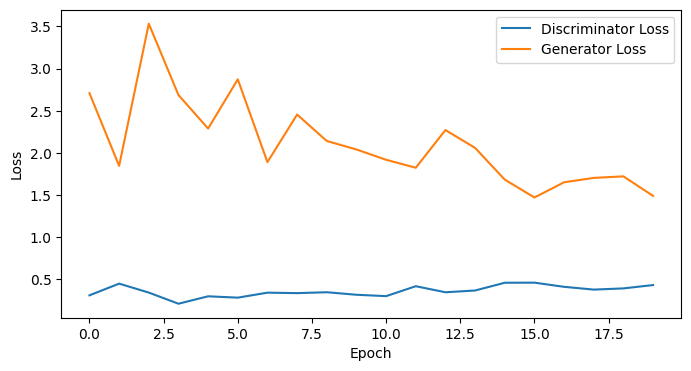

epoch: 20, Discriminator Loss : 0.3618921905755997, Generator Loss : 2.112947690486908
epoch :  20


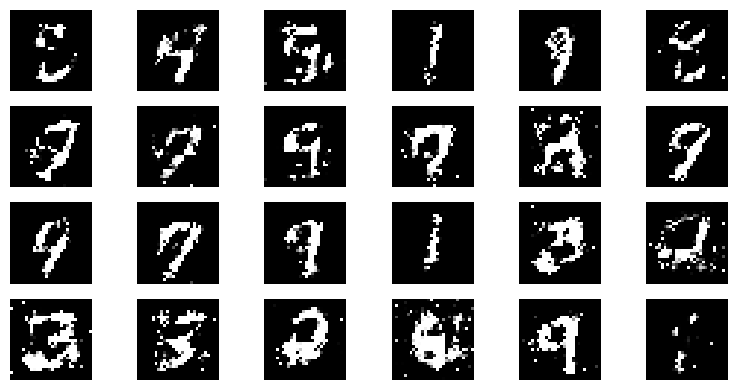

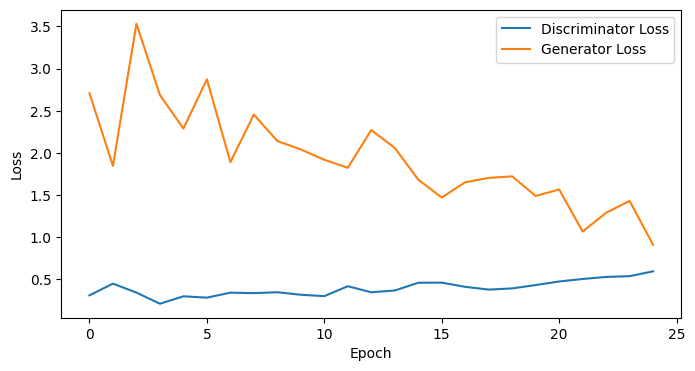

epoch: 25, Discriminator Loss : 0.3954073965549469, Generator Loss : 1.9410364127159119
epoch :  25


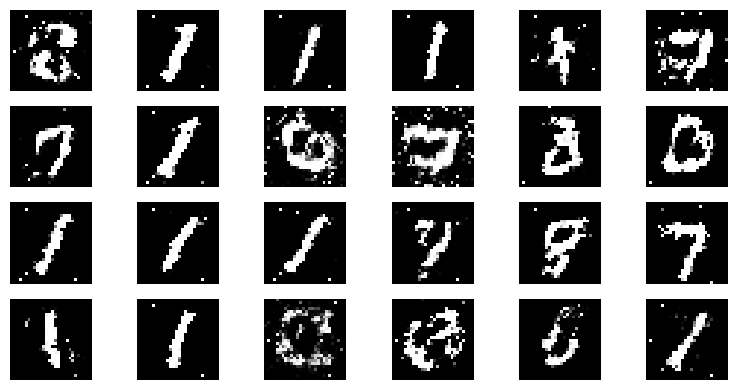

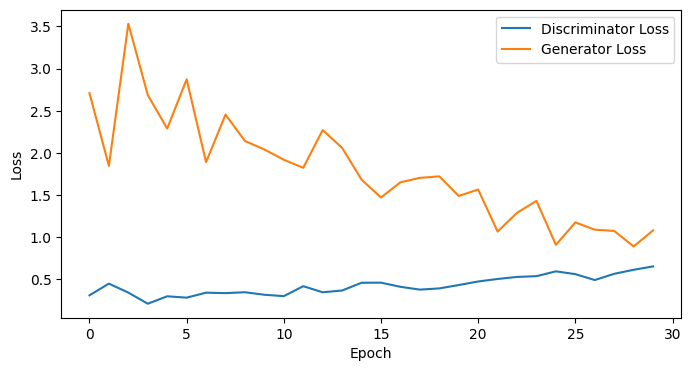

epoch: 30, Discriminator Loss : 0.42594444354375205, Generator Loss : 1.7947043279806774
epoch :  30


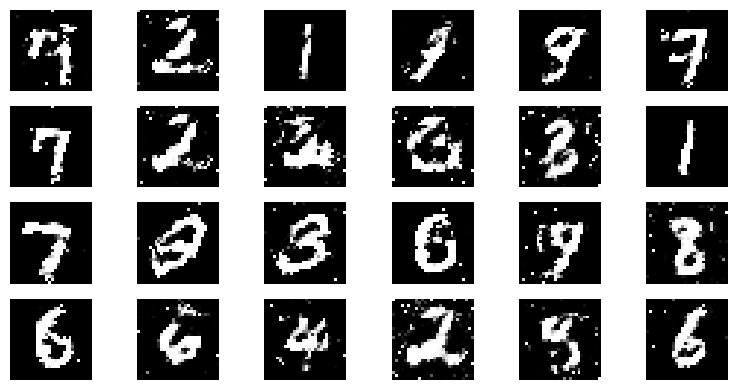

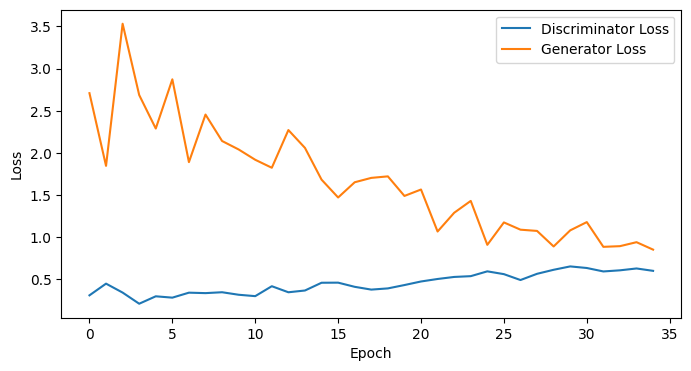

epoch: 35, Discriminator Loss : 0.4528720668384007, Generator Loss : 1.6742352417537145
epoch :  35


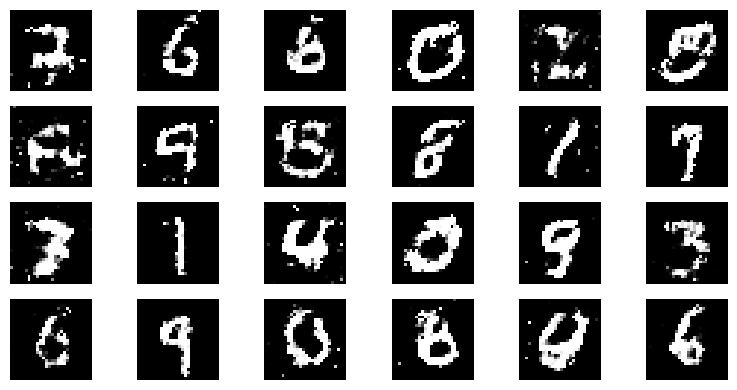

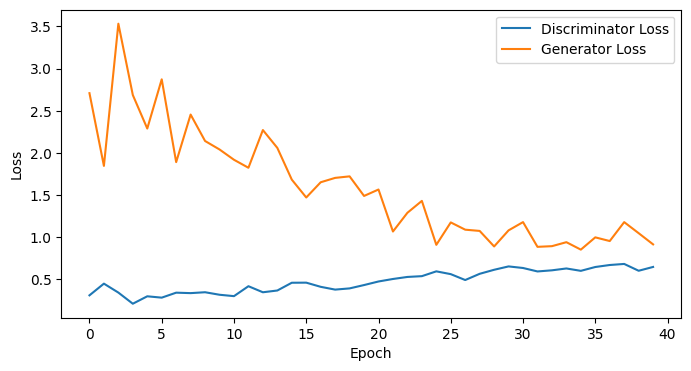

epoch: 40, Discriminator Loss : 0.4776381984353065, Generator Loss : 1.5924320355057717
epoch :  40


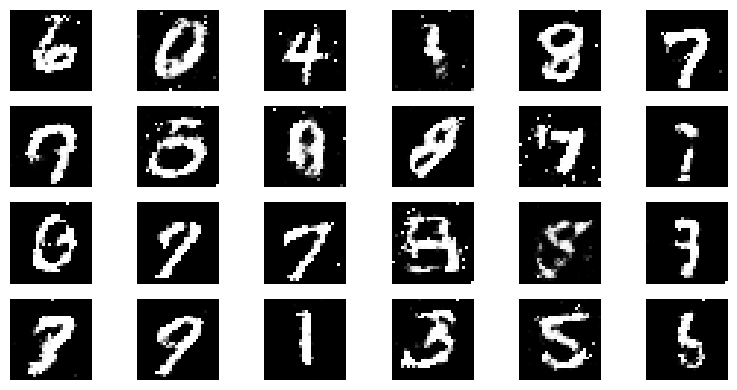

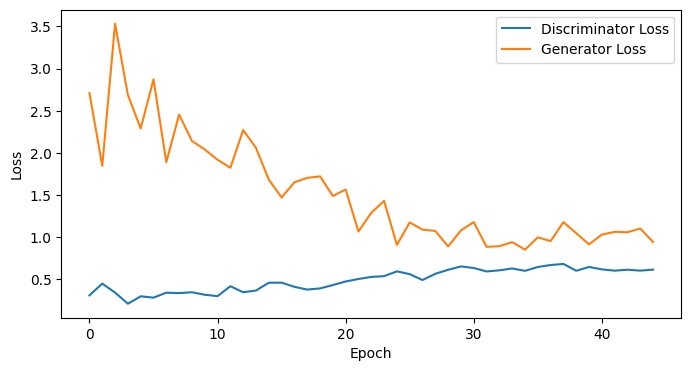

epoch: 45, Discriminator Loss : 0.4925922671953837, Generator Loss : 1.5311609652307299
epoch :  45


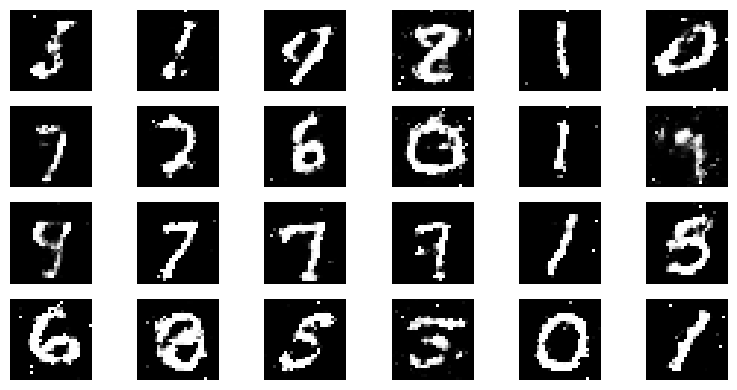

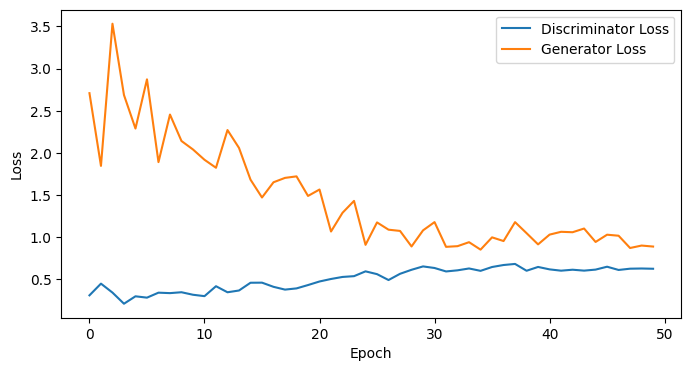

epoch: 50, Discriminator Loss : 0.506308159828186, Generator Loss : 1.4723322701454162
epoch :  50


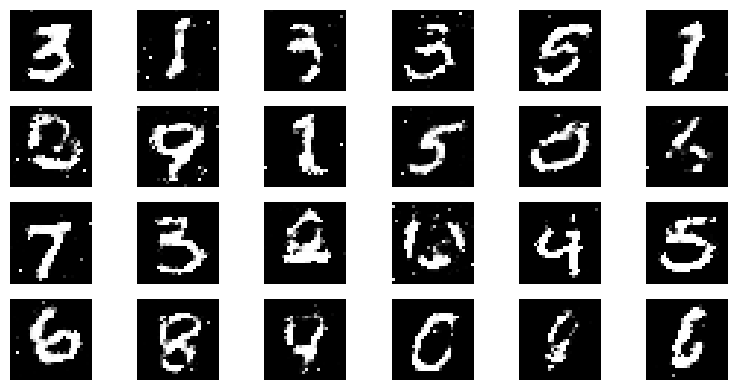

CPU times: user 30min 10s, sys: 1min 14s, total: 31min 24s
Wall time: 32min 49s


In [21]:
%%time

EPOCHS = 50
BATCH_SIZE = 128

# 'discriminator', 'gan(generator)' Loss 저장 List
d_losses = []
g_losses = []

for epoch in range(1, EPOCHS + 1):
  # batch 별 학습
  for real_images in get_batches(X_train, BATCH_SIZE):
    # Random Noise 생성
    input_noise = np.random.uniform(-1, 1, size = [BATCH_SIZE, NOISE_DIM])

    # Fake Noise 생성
    generated_images = generator.predict(input_noise, verbose = 0)

    # 'discriminator' 학습용 X 데이터 정의
    x_dis = np.concatenate([real_images, generated_images])

    # 'discriminator' 학습용 y 데이터 정의
    y_dis = np.zeros(2 * BATCH_SIZE)
    y_dis[:BATCH_SIZE] = 1

    # 'discriminator' 학습
    discriminator.trainable = True,
    d_loss = discriminator.train_on_batch(x_dis, y_dis)

    # 'discriminator' 학습 정지
    discriminator.trainable = False

    # 'gan(geneerator)' 학습용 X,y 데이터 생성
    noise = np.random.uniform(-1,1,size=[BATCH_SIZE, NOISE_DIM])
    y_gan = np.ones(BATCH_SIZE)

    # 'gan(geneerator)' 학습
    g_loss = gan.train_on_batch(noise, y_gan)

  d_losses.append(d_loss)
  g_losses.append(g_loss)

  # 생성 결과 시각화
  if epoch == 1 or epoch % 5 == 0:
    visualize_training(epoch, d_losses, g_losses)